<a href="https://colab.research.google.com/github/shreya63807/sales-/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving data.xlsx to data.xlsx


In [4]:
import pandas as pd
df = pd.read_excel('data.xlsx', engine= 'openpyxl')
df.head()
df

,Customer_ID,Customer_Name,Region,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index,Churned
0,101,John Doe,North,5000,12,2000,1.2,No
1,102,Jane Smith,South,3000,8,1500,1.0,Yes
2,103,Sam Brown,East,4500,10,1800,1.1,No
3,104,Linda Johnson,West,2500,5,1000,0.9,Yes
4,105,Michael Lee,North,7000,15,2500,1.3,No
5,106,Emily Davis,South,3200,7,1400,1.0,Yes
6,107,David Wilson,East,5300,14,2300,1.2,No
7,108,Susan White,West,2900,6,1100,0.8,Yes
8,109,Chris Martin,North,6000,13,2200,1.2,No
9,110,Anna Taylor,South,3100,8,1350,0.9,Yes


In [5]:
#Checking missing values
df.isna().sum()

,0
Customer_ID,0
Customer_Name,0
Region,0
Total_Spend,0
Purchase_Frequency,0
Marketing_Spend,0
Seasonality_Index,0
Churned,0


In [6]:
#Checking the outliers using z-score

import numpy as np
from scipy import stats

# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['Customer_ID'])
# Compute z-scores for all numeric columns
z_scores = stats.zscore(numeric_df)
# Convert to a DataFrame for better visualization
z_df = pd.DataFrame(z_scores, columns=numeric_df.columns)

print(z_df)

    Total_Spend  Purchase_Frequency  Marketing_Spend  Seasonality_Index
0      0.638042            0.800641         0.692902           1.042572
1     -0.841475           -0.480384        -0.373101          -0.291920
2      0.268162            0.160128         0.266501           0.375326
3     -1.211354           -1.441153        -1.439105          -0.959166
4      2.117558            1.761410         1.758906           1.709818
5     -0.693523           -0.800641        -0.586302          -0.291920
6      0.859969            1.441153         1.332504           1.042572
7     -0.915451           -1.120897        -1.225904          -1.626412
8      1.377800            1.120897         1.119304           1.042572
9     -0.767499           -0.480384        -0.692902          -0.959166
10     0.416114            0.480384         0.479702           0.375326
11    -1.137378           -1.441153        -1.332504          -1.626412
12     1.007921            0.800641         0.906103           1

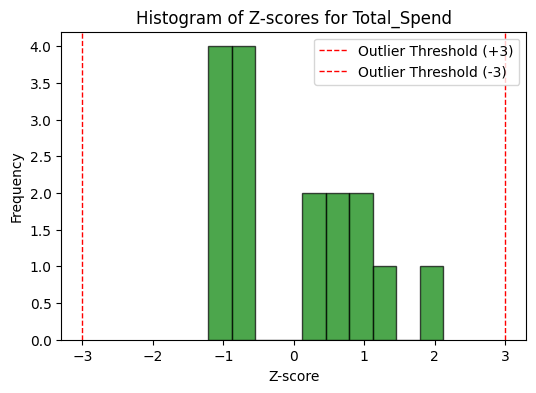

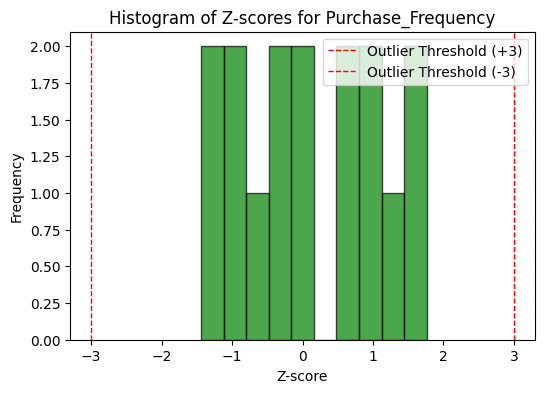

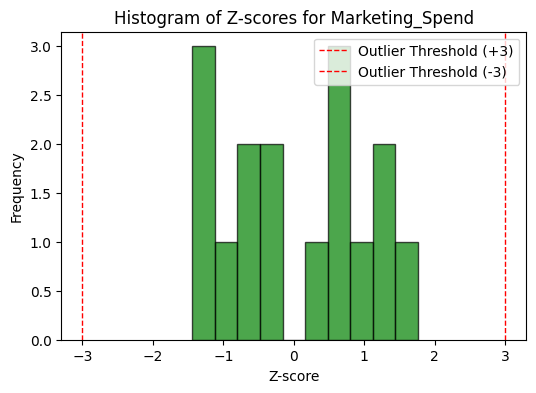

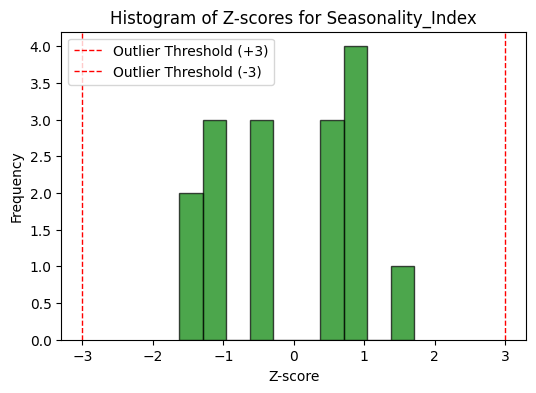

In [7]:
import matplotlib.pyplot as plt
# Plot histograms for each column
for col in z_scores.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(z_scores[col], bins=10, edgecolor='black', alpha=0.7, color='green')
    plt.axvline(3, color='red', linestyle='dashed', linewidth=1, label="Outlier Threshold (+3)")
    plt.axvline(-3, color='red', linestyle='dashed', linewidth=1, label="Outlier Threshold (-3)")
    plt.title(f'Histogram of Z-scores for {col}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Linear Regression:

#Define the dependent and independent variables


Revenue = df['Total_Spend']* df['Purchase_Frequency']
X = df[["Seasonality_Index", "Marketing_Spend"]]
y = Revenue

#Train and test the model

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

#Make Predictions

y_pred = model.predict(X_test)

#Evaluate the model

mse = mean_squared_error(Y_test, y_pred)
r2= r2_score(Y_test, y_pred)

print("mean squared error:", mse)
print("R squared score:", r2)
# Print actual vs predicted values
predictions_df = pd.DataFrame({"Actual Sales": Y_test, "Predicted Sales": y_pred})

# Prediction for future scenarios

future_data = pd.DataFrame({
    "Marketing_Spend": [2500, 3000, 3500, 4000],
    "Seasonality_Index": [1.2, 1.3, 1.4, 1.5],
    "Purchase_Frequency": [12, 10, 14, 11],
    "Total_Amount": [4000, 3500, 4500, 5000]
})

# Calculate a column for future revenue based on Marketing_Spend and Seasonality_Index
future_data["Future_Revenue"] = future_data["Marketing_Spend"] * future_data["Seasonality_Index"]

# Calculate revenue as Purchase_Frequency * Total_Amount (as per your definition)
future_data["Calculated_Revenue"] = future_data["Purchase_Frequency"] * future_data["Total_Amount"]


features = future_data[["Seasonality_Index","Marketing_Spend"]]
future_revenue = model.predict(features)


future_data["Predicted_Revenue"] = future_revenue

# Show the final DataFrame
print("\nPredicted sales based on marketing spend and seasonality:\n\n",future_data.drop(columns=["Future_Revenue", "Calculated_Revenue"]))





mean squared error: 75076707.24582335
R squared score: 0.740879695600281

Predicted sales based on marketing spend and seasonality:

    Marketing_Spend  Seasonality_Index  Purchase_Frequency  Total_Amount  \
0             2500                1.2                  12          4000   
1             3000                1.3                  10          3500   
2             3500                1.4                  14          4500   
3             4000                1.5                  11          5000   

   Predicted_Revenue  
0       91148.388656  
1      118887.415404  
2      146626.442153  
3      174365.468901  


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#Logistic Regression

scaler = StandardScaler()

churn_rate = df["Churned"].map({"No": 0, "Yes": 1})
X = df[["Total_Spend", "Purchase_Frequency", "Marketing_Spend", "Seasonality_Index"]]
y = churn_rate

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler.fit(X_train)


model = LogisticRegression(max_iter=1000, solver='lbfgs')

model.fit(X_train, Y_train)

y_pred=model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Predicting churn for future customers using the trained Logistic Regression model

# Define new customer data for prediction (same format as training data)
future_customers = pd.DataFrame({
    "Total_Spend": [4000, 6000, 7000, 2500],  # Example spending patterns
    "Purchase_Frequency": [10, 14, 16, 5],  # Example purchase behavior
    "Marketing_Spend": [1500, 2200, 2800, 900],  # Future marketing budget
    "Seasonality_Index": [1.1, 1.3, 1.5, 0.8]  # Future seasonal conditions
})

# Ensure the new data is standardized using the existing fitted scaler
future_customers_scaled = pd.DataFrame(scaler.transform(future_customers), columns=future_customers.columns)

# Predict churn for future customers using the trained model
future_churn_predictions = model.predict(future_customers_scaled)

# Add predictions to the DataFrame
future_customers["Churn_Prediction"] = future_churn_predictions
future_customers["Churn_Prediction"] = future_customers["Churn_Prediction"].map({0: "No", 1: "Yes"})

# Print the future churn predictions
print(future_customers)




Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

   Total_Spend  Purchase_Frequency  Marketing_Spend  Seasonality_Index  \
0         4000                  10             1500                1.1   
1         6000                  14             2200                1.3   
2         7000                  16             2800                1.5   
3         2500                   5              900                0.8   

  Churn_Prediction  
0              Yes  
1              Yes  
2              Yes  
3              Yes  


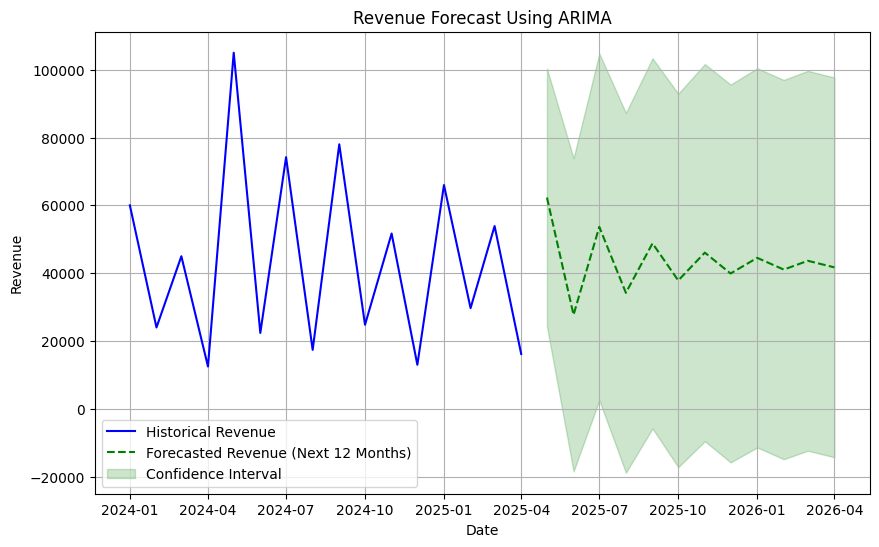

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df.index = pd.date_range(start="2024-01-01", periods=len(df), freq='MS')

# Fit an ARIMA model
model = ARIMA(Revenue, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future revenue for the next 12 months
forecast_result = model_fit.get_forecast(steps=12)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()  # Confidence interval now correctly defined

# Create index for the forecasted period
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_series = pd.Series(forecast.values, index=forecast_index)

# Plotting historical revenue and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, Revenue, label='Historical Revenue', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Revenue (Next 12 Months)', color='green', linestyle='--')
plt.fill_between(forecast_series.index,
                 conf_int.iloc[:, 0].values,
                 conf_int.iloc[:, 1].values,
                 color='green', alpha=0.2, label='Confidence Interval')

plt.title('Revenue Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()



In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df['Revenue'] = df['Total_Spend'] * df['Purchase_Frequency']

model = ols('Revenue ~ C(Region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
region_stats = df.groupby("Region")["Revenue"].agg(["mean", "std"]).reset_index()
print("\nSummary Statistics of Sales Across Regions:\n", region_stats)




                 sum_sq    df          F    PR(>F)
C(Region)  9.837512e+09   3.0  22.922381  0.000029
Residual   1.716665e+09  12.0        NaN       NaN

Summary Statistics of Sales Across Regions:
   Region     mean           std
0   East  56200.0  12582.792483
1  North  77250.0  19956.202043
2  South  25225.0   3145.764348
3   West  14775.0   2397.741993


In [12]:
# Prepare variables for regression: Revenue (dependent) and Marketing_Spend (independent)
X = df[['Marketing_Spend']]
y = df['Revenue']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     243.0
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           3.06e-10
Time:                        14:02:51   Log-Likelihood:                -162.60
No. Observations:                  16   AIC:                             329.2
Df Residuals:                      14   BIC:                             330.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.995e+04   6216.361     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
from sklearn.decomposition import FactorAnalysis

# Select the relevant features from your DataFrame
data = df[['Total_Spend', 'Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index']]

# Initialize and fit the Factor Analysis model
# n_components is the number of factors you want to extract (this can be tuned)
fa = FactorAnalysis(n_components=2, random_state=42)
fa.fit(data)

# Get the factor loadings
loadings = pd.DataFrame(fa.components_.T,
                        index=data.columns,
                        columns=['Factor1', 'Factor2'])
print(loadings)

                        Factor1    Factor2
Total_Spend         1351.374953 -33.592966
Purchase_Frequency     3.018203   0.669026
Marketing_Spend      458.477553  98.981480
Seasonality_Index      0.141543   0.031060


In [14]:
X_segmentation = df[["Total_Spend", "Purchase_Frequency", "Marketing_Spend", "Seasonality_Index"]]
y_segmentation = df['Revenue']

# Step 3: Initialize and fit a Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_model.fit(X_segmentation, y_segmentation)

# Step 4: Predict revenue for segmentation purposes
predictions = tree_model.predict(X_segmentation)

# Step 5: Create custom labels based on predicted revenue
df['Predicted_Revenue'] = predictions
df['Customer_Segment'] = pd.cut(
    df['Predicted_Revenue'],
    bins=[0, 30000, 60000, 100000],
    labels=['Low-Value Customer', 'Mid-Value Customer', 'High-Value Customer']
)

# Display how many customers fall into each segment
print(df[['Customer_Segment']].value_counts())

# Step 6: Visualize the decision tree with custom labels
plt.figure(figsize=(12, 8))
plot_tree(
    tree_model,
    feature_names=["Total_Spend", "Purchase_Frequency", "Marketing_Spend", "Seasonality_Index"],
    filled=True,
    rounded=True,
    fontsize=12,
    impurity=False,   # Hide impurity details
    proportion=True,  # Show proportion instead of raw counts
    precision=0       # No decimals for values
)
plt.title("Customer Segmentation Tree (High/Mid/Low Value Customers)", fontsize=14)
plt.show()

# Optional: View the final dataframe with segments
print(df.head())

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
from sklearn.cluster import KMeans


X = df[["Total_Spend", "Purchase_Frequency", "Marketing_Spend", "Seasonality_Index"]]

# Step 3: Standardize the features (Important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


# Step 5: Apply K-Means with optimal clusters (e.g., 3 for Low/Medium/High Spenders)
optimal_clusters = 3  # You can change this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Assign readable labels based on cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_order = cluster_centers[:, 0].argsort()  # Sort by Total_Spend

labels = ['Low Spender', 'Medium Spender', 'High Spender']
cluster_label_map = {old_label: labels[i] for i, old_label in enumerate(cluster_order)}
df['Spending_Category'] = df['Cluster'].map(cluster_label_map)

# Step 7: Visualize the clusters (using the first two features for simplicity)
plt.figure(figsize=(10, 6))
for label in df['Spending_Category'].unique():
    plt.scatter(
        df[df['Spending_Category'] == label]['Total_Spend'],
        df[df['Spending_Category'] == label]['Purchase_Frequency'],
        label=label
    )

plt.title('Customer Segmentation Based on Spending Behavior (K-Means Clusters)')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Output the final dataset with cluster information
print(df[['Total_Spend', 'Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index', 'Spending_Category']].head())